# 주제: 지도 학습 - 회귀(Regression) 알고리즘

* 이번 주에는 **머신러닝에서 회귀(Regression) 문제를 해결하는 방법**을 배운다.
* **목표**:
  * 회귀 문제의 개념과 응용 이해
  * 주요 회귀 알고리즘(`Linear Regression`, `Ridge`, `Lasso`, `Decision Tree Regressor`, `Random Forest Regressor`) 학습
  * 회귀 모델을 학습시키고 평가하는 방법 익히기

# 실습 공간

In [ ]:
## 이곳에서 자유롭게 실습을 진행하세요. 코드 셀을 여러개 생성해도 좋습니다. ##
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Linear Regression MSE: {mse:.4f}")

Linear Regression MSE: 0.1935


# 추가 연습문제 (20 pts)

## 1. 선형 회귀와 회귀 계수 출력하기 (2 pts)

> **문제**: `coef_`와 `intercept_`를 사용하여 회귀 계수를 출력하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

print(f"Age Coefficients: {model.coef_[0]:.4f}")
print(f"Fare Coefficients: {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
# 변수 영역에 model.coef_와 model.intercept_를 적용하면 회귀계수와 절편을 출력할 수 있음
# Y=aX+b일 때 Y는 종속변수, X는 독립변수이고, a는 회귀계수(기울기), b는 절편임

Age Coefficients: -0.0054
Fare Coefficients: 0.0007
Intercept: 0.8146


## 2. 다양한 `alpha` 값을 테스트하여 Ridge Regression 성능 비교하기 (2 pts)

> **문제**: `alpha` 값을 0.1, 1, 10 으로 변경하면서 `alpha` 값에 따른 `MSE`를 비교하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset("tips").dropna()
X = df[["total_bill"]]
Y = df["tip"]
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)

alphas = [0.1, 1, 10]
for alpha in alphas :
  model = Ridge(alpha=alpha)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  mse = mean_squared_error(Y_test, Y_pred)
  print(f"Ridge MSE alpha {alpha}: {mse:.4f}")

Ridge MSE alpha 0.1: 0.8568
Ridge MSE alpha 1: 0.8579
Ridge MSE alpha 10: 0.8703


## 3. Lasso 회귀에서 불필요한 변수 제거 여부 확인하기 (2 pts)

> **문제**: `coef_` 값을 출력하여 특정 feature의 계수(가중치)가 0이 되는지 확인하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

df = sns.load_dataset("titanic").dropna()
df["alone"] = df["alone"].astype(bool)
X = df[["age", "fare", "alone"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Lasso()
# Lasso 모델은 중요하지 않은 특성은 제거하고 모델을 만듦
model.fit(X_train, Y_train)
# Lasso 회귀 모델에는 반드시 숫자형 또는 범주형만 들어가야 함

print(f"Age Coefficients: {model.coef_[0]:4f}")
print(f"Fare Coefficients: {model.coef_[1]:4f}")
print(f"Alone Coefficients: {model.coef_[2]:.4f}")
# Alone의 가중치가 0이 되었으므로 Alone이 제거되었음을 알 수 있음
if model.coef_[0] == 0:
  print("age는 사라졌습니다")
else:
  print("age는 사라지지 않았습니다")
if model.coef_[1] == 0:
  print("fare는 사라졌습니다")
else:
  print("fare는 사라지지 않았습니다")
if model.coef_[2] == 0:
  print("alone은 사라졌습니다")
else:
  print("alone은 사라지지 않았습니다")

Age Coefficients: -0.000974
Fare Coefficients: 0.000619
Alone Coefficients: -0.0000
age는 사라지지 않았습니다
fare는 사라지지 않았습니다
alone은 사라졌습니다
이 변수는 사라졌습니다


IndexError: index 3 is out of bounds for axis 0 with size 3

## 4. 결정 트리 회귀 모델을 시각화하기 (2 pts)

> **문제**: `plot_tree()`를 사용하여 트리 구조를 시각화하라.

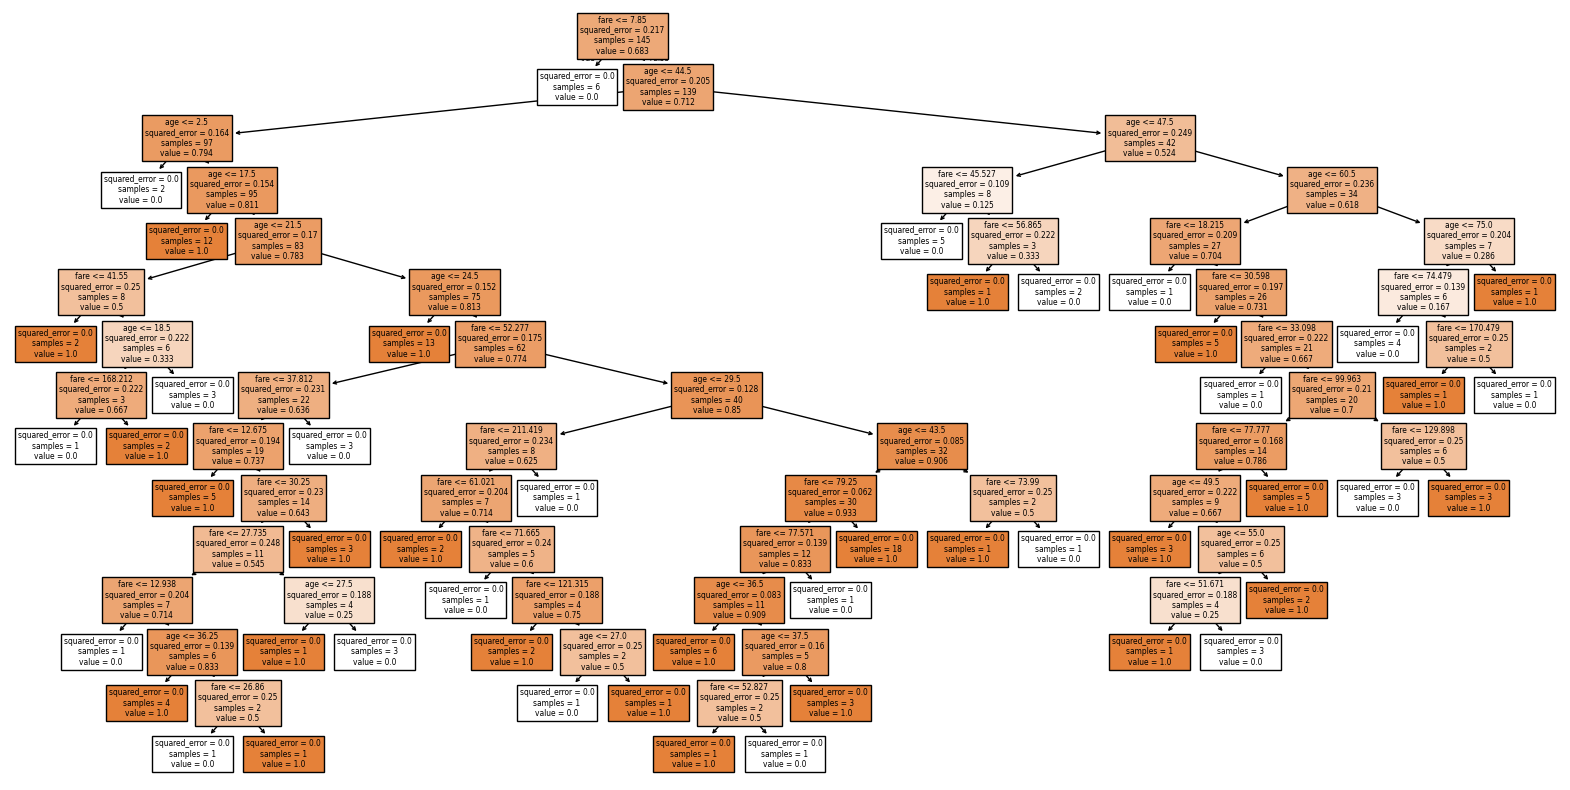

[Text(0.3952205882352941, 0.9666666666666667, 'x[1] <= 7.85\nsquared_error = 0.217\nsamples = 145\nvalue = 0.683'),
 Text(0.36580882352941174, 0.9, 'squared_error = 0.0\nsamples = 6\nvalue = 0.0'),
 Text(0.3805147058823529, 0.9333333333333333, 'True  '),
 Text(0.42463235294117646, 0.9, 'x[0] <= 44.5\nsquared_error = 0.205\nsamples = 139\nvalue = 0.712'),
 Text(0.4099264705882353, 0.9333333333333333, '  False'),
 Text(0.11397058823529412, 0.8333333333333334, 'x[0] <= 2.5\nsquared_error = 0.164\nsamples = 97\nvalue = 0.794'),
 Text(0.08455882352941177, 0.7666666666666667, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.14338235294117646, 0.7666666666666667, 'x[0] <= 17.5\nsquared_error = 0.154\nsamples = 95\nvalue = 0.811'),
 Text(0.11397058823529412, 0.7, 'squared_error = 0.0\nsamples = 12\nvalue = 1.0'),
 Text(0.17279411764705882, 0.7, 'x[0] <= 21.5\nsquared_error = 0.17\nsamples = 83\nvalue = 0.783'),
 Text(0.058823529411764705, 0.6333333333333333, 'x[1] <= 41.55\nsquared_er

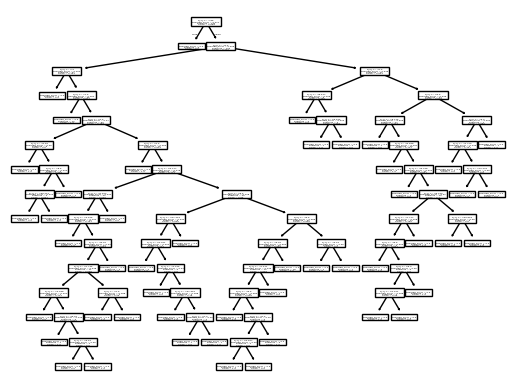

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

plt.figure(figsize=(20,10))
# 그림의 크기를 설정해야 보기 쉬움
plot_tree(model, feature_names=["age", "fare"], class_names=["died", "survived"], filled=True)
# plot_tree(모델이름, 특성이름, 클래스이름, filled=True/False)을 통해 결정트리 그림을 만들 수 있음
plt.show()
plot_tree(model)

## 5. XGBoost 회귀 모델을 사용하여 예측 성능 비교하기 (2 pts)

> **문제**: `XGBRegressor()`를 사용하여 `fare`를 예측하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("titanic").dropna()
X = df[["age"]]
Y = df["fare"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model1 = XGBRegressor()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(Y_test, Y_pred1)
print(f"XGBRegressor MSE: {mse1:.4f}")

model2 = LinearRegression()
model2.fit(X_train, Y_train)

Y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(Y_test, Y_pred2)
print(f"Linear Regression MSE: {mse2:.4f}")

XGBRegressor MSE: 8353.1596
Linear Regression MSE: 3339.2021


## 6. LightGBM 회귀 모델을 사용하여 예측 수행하기 (2 pts)

> **문제**: `LGBMRegressor()`를 사용하여 `fare`를 예측하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("titanic").dropna()
X = df[["age"]]
Y = df["fare"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model1 = LGBMRegressor()
model1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(Y_test, Y_pred1)
print(f"LGBMRegressor MSE: {mse1:.4f}")

model2 = LinearRegression()
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(Y_test, Y_pred1)
print(f"LinearRegression MSE: {mse2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 1
[LightGBM] [Info] Start training from score 78.729944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

## 7. Gradient Boosting Regressor를 활용한 회귀 모델 학습하기 (2 pts)

> **문제**: `GradientBoostingRegressor()`를 사용하여 모델을 학습하라

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Gradient Boosting Regressor MSE: {mse:.4f}")

Gradient Boosting Regressor MSE: 0.2349


## 8. 평가 지표 MAE (Mean Absolute Error) 계산하기 (2 pts)

> **문제**: `mean_absolute_error(y_test, y_pred)`를 계산하라

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Linear Regression MAE: {mae:.4f}")

Linear Regression MAE: 0.3980


## 9. 회귀 모델을 사용하여 새로운 데이터 예측하기 (2 pts)

> **문제**: `model.predict()`를 사용하여 새로운 샘플의 `fare`를 예측하라

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

new_sample = pd.DataFrame({"age": [60], "fare": [120]})

Y_pred = model.predict(new_sample)
if Y_pred > 0.5:
  Y_pred = "생존"
else:
    Y_pred = "사망"
print(f"Survived Predict: {Y_pred}")

Survived Predict: 생존


## 10. Pipeline을 사용하여 데이터 변환과 모델 학습을 한 번에 수행하기 (2 pts)

> **문제**: `Pipeline`을 사용하여 `StandardScaler()`와 회귀 모델을 결합하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

pipeline = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
pipeline.fit(X, Y)

Y_pred = pipeline.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Pipeline MSE: {mse:.4f}")

Pipeline MSE: 0.1859


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
some_digit = X[0]
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

'5'

In [ ]:
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

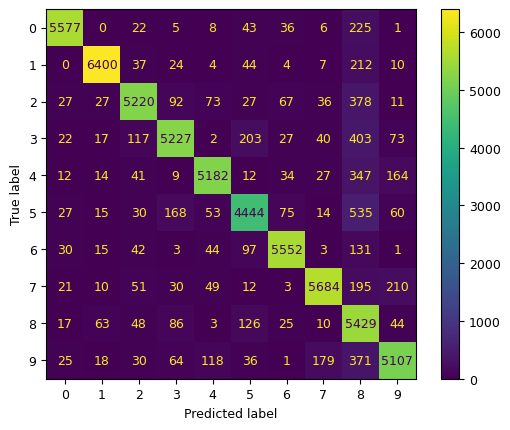

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

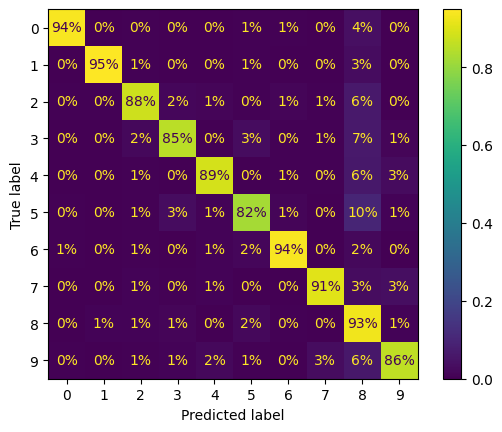

In [ ]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

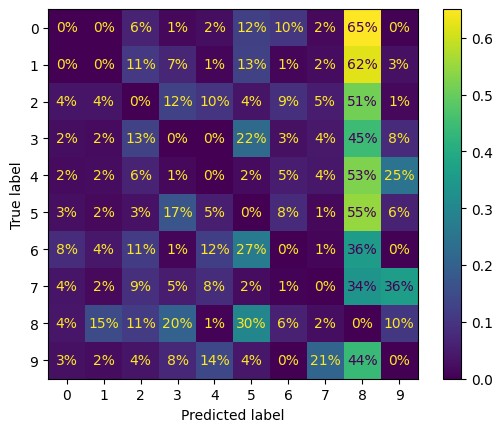

In [ ]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

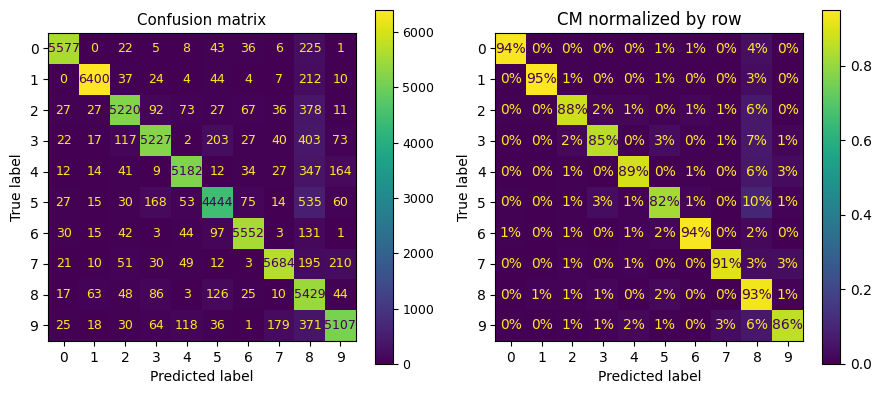

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

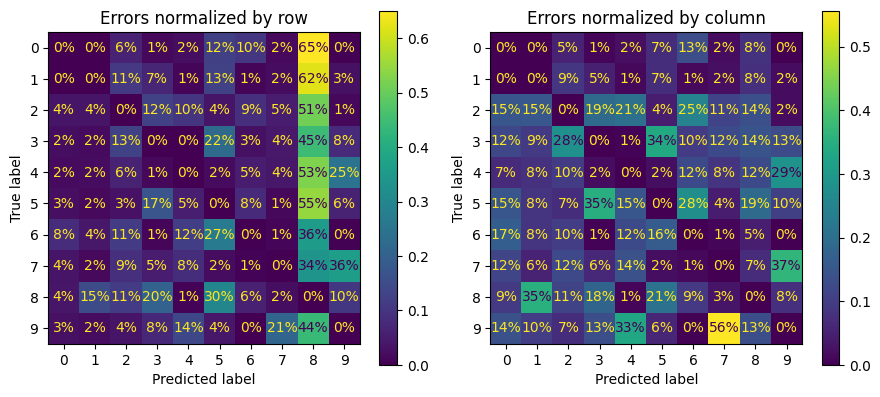

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

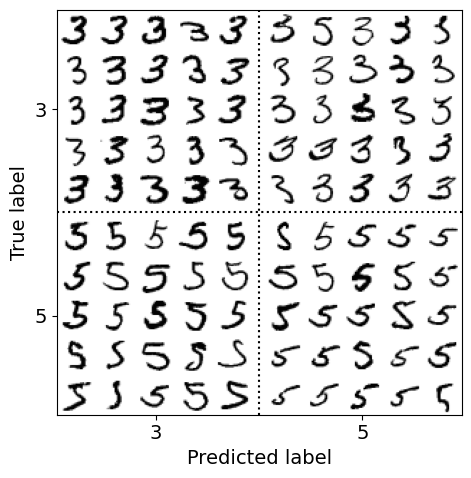

In [ ]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [ ]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

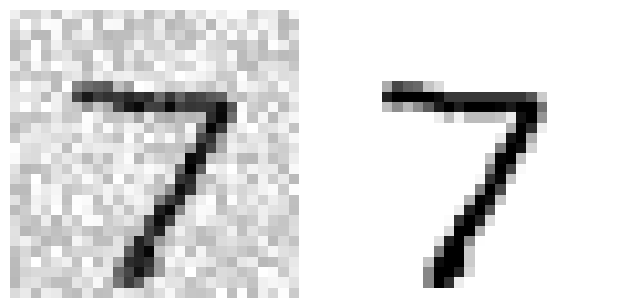

In [ ]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

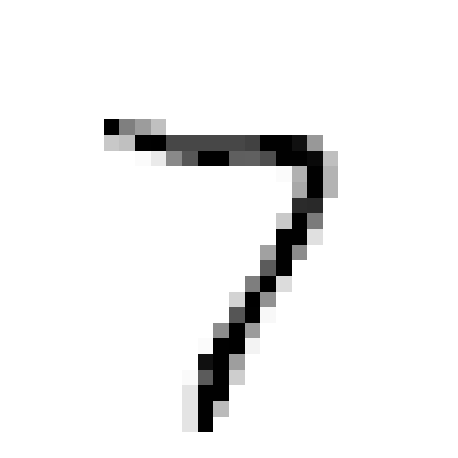

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")
plt.show()